# Eager Execution

Adapted from: https://www.tensorflow.org/get_started/eager

In [1]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train_dataset_fp = '../data/iris_training.csv'

In [4]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


## Csv parser

In [5]:
def parse_csv(line):
    example_defaults = [[0.], [0.], [0.], [0.], [0]]
    parsed_line = tf.decode_csv(line, example_defaults)
    features = tf.reshape(parsed_line[:-1], shape=(4,))
    label = tf.reshape(parsed_line[-1], shape=())
    return features, label

## Dataset API

In [6]:
train_dataset = tf.data.TextLineDataset(train_dataset_fp)
train_dataset = train_dataset.skip(1)
train_dataset = train_dataset.map(parse_csv)
train_dataset = train_dataset.shuffle(buffer_size=1000)
train_dataset = train_dataset.batch(32)

In [7]:
train_dataset

<BatchDataset shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

In [8]:
features, label = tfe.Iterator(train_dataset).next()

In [9]:
features

<tf.Tensor: id=41, shape=(32, 4), dtype=float32, numpy=
array([[5.9, 3. , 5.1, 1.8],
       [6.4, 3.1, 5.5, 1.8],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 3.3, 6. , 2.5],
       [6.7, 3. , 5.2, 2.3],
       [5.2, 2.7, 3.9, 1.4],
       [7.2, 3. , 5.8, 1.6],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [5.7, 2.9, 4.2, 1.3],
       [4.9, 2.5, 4.5, 1.7],
       [6.4, 3.2, 5.3, 2.3],
       [4.8, 3. , 1.4, 0.1],
       [4.4, 3.2, 1.3, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.8, 1.5, 0.3],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 2.8, 6.7, 2. ],
       [6. , 3. , 4.8, 1.8],
       [5.5, 2.6, 4.4, 1.2],
       [5. , 2. , 3.5, 1. ],
       [7.7, 3. , 6.1, 2.3],
       [7.2, 3.2, 6. , 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [5.7, 4.4, 1.5, 0.4],
       [6.5, 3. , 5.8, 2.2],
       [6.5, 3. , 5.2, 2. ]], dtype=float32)>

In [10]:
label

<tf.Tensor: id=42, shape=(32,), dtype=int32, numpy=
array([2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 1, 1, 2, 2, 2, 0, 2, 2], dtype=int32)>

## Model

Note that the model is outputting the logits, not the softmax probabilities.

In [11]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(3)
])

In [12]:
model

model behaves like a function:

In [13]:
model(features)

<tf.Tensor: id=128, shape=(32, 3), dtype=float32, numpy=
array([[ 4.2539949e+00,  1.5243943e-01, -8.5028416e-01],
       [ 4.5483789e+00,  2.0291850e-01, -9.4734544e-01],
       [ 5.4946308e+00,  1.6526550e-01, -1.0854921e+00],
       [ 4.7338872e+00,  2.6916209e-01, -1.0072854e+00],
       [ 4.5094638e+00,  1.6086538e-01, -8.8099384e-01],
       [ 3.6015520e+00, -2.3551732e-02, -5.9833330e-01],
       [ 4.7489953e+00,  2.6443470e-01, -1.0180339e+00],
       [ 3.0010951e+00, -8.8622046e-01,  2.4911791e-01],
       [ 2.9125016e+00, -8.8413519e-01,  2.7203953e-01],
       [ 3.8906255e+00, -3.0888019e-02, -6.4638734e-01],
       [ 3.6105783e+00,  1.8799306e-01, -7.6286066e-01],
       [ 4.5267081e+00,  1.3125609e-01, -8.6126745e-01],
       [ 2.6456301e+00, -7.5464243e-01,  2.1193738e-01],
       [ 2.6779816e+00, -8.0588877e-01,  2.1824647e-01],
       [ 5.0988317e+00,  6.4706361e-01, -1.3836458e+00],
       [ 3.1836188e+00, -1.0498626e+00,  3.4785885e-01],
       [ 3.1573865e+00, -9.5789

In eager mode we can access the values of the weights directly:

In [14]:
for i, v in enumerate(model.variables):
    print("Weight shape: ", v.shape)
    print("Weight tensor: ", v)
    print()


Weight shape:  (4, 10)
Weight tensor:  <tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
array([[-0.3669138 , -0.35407218,  0.14949417, -0.48221236, -0.07870758,
         0.18085927, -0.6423741 ,  0.37449908,  0.2256375 ,  0.6354954 ],
       [ 0.3447078 , -0.51886564,  0.5403429 ,  0.13630885, -0.59894377,
        -0.22230014, -0.13240385,  0.33249986,  0.6321626 , -0.54063094],
       [-0.09006935,  0.21660113, -0.03805065, -0.45049065, -0.42898136,
         0.6000395 , -0.16155943,  0.37692845,  0.04593593, -0.3187553 ],
       [-0.4258747 ,  0.5369731 , -0.46732014, -0.20957232,  0.24765903,
         0.09375465, -0.38842997,  0.31011492, -0.24771693, -0.50823724]],
      dtype=float32)>

Weight shape:  (10,)
Weight tensor:  <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

Weight shape:  (10, 10)
Weight tensor:  <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.

## Loss

Loss is sparse categorical cross entropy

In [15]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

In [16]:
loss(model, features, label)

<tf.Tensor: id=193, shape=(), dtype=float32, numpy=3.4324913>

## Gradients

In eager mode we can evaluate the gradients

In [17]:
def grad(model, inputs, targets):
    with tfe.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, model.variables)

In [18]:
grads = grad(model, features, label)

In [19]:
for i, g in enumerate(grads):
    print("Gradient shape: ", g.shape)
    print("Gradient tensor: ", g)
    print()


Gradient shape:  (4, 10)
Gradient tensor:  tf.Tensor(
[[ 0.          0.          1.3871851   0.          0.          2.072489
   0.          1.4562786   0.5741236  -0.6011344 ]
 [ 0.          0.          0.61810094  0.          0.          0.9153922
   0.          0.65473425  0.25976807 -0.22688143]
 [ 0.          0.          1.1854033   0.          0.          1.821793
   0.          1.2037585   0.45993546 -0.52120507]
 [ 0.          0.          0.42208365  0.          0.          0.6691714
   0.          0.41161376  0.1505142  -0.16477932]], shape=(4, 10), dtype=float32)

Gradient shape:  (10,)
Gradient tensor:  tf.Tensor(
[ 0.          0.          0.20794976  0.          0.          0.29311177
  0.          0.23278897  0.09728041 -0.08303249], shape=(10,), dtype=float32)

Gradient shape:  (10, 10)
Gradient tensor:  tf.Tensor(
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [

## Optimizer

Let's use simple gradient descent

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

## Training Loop

In [21]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

# Loop over epochs
for epoch in range(num_epochs):
    
    # accumulators for mean loss and accuracy
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()

    # loop on dataset, for each batch:
    for x, y in tfe.Iterator(train_dataset):
        # Calculate gradients
        grads = grad(model, x, y)
        
        # Apply gradients to the weights
        optimizer.apply_gradients(zip(grads, model.variables),
                                  global_step=tf.train.get_or_create_global_step())

        # accumulate loss
        epoch_loss_avg(loss(model, x, y))
        
        # calculate predictions
        y_pred = tf.argmax(model(x), axis=1, output_type=tf.int32)
        # acccumulate accuracy
        epoch_accuracy(y_pred, y)

    # end epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

Epoch 000: Loss: 2.222, Accuracy: 35.000%
Epoch 050: Loss: 0.523, Accuracy: 94.167%
Epoch 100: Loss: 0.217, Accuracy: 96.667%
Epoch 150: Loss: 0.138, Accuracy: 96.667%
Epoch 200: Loss: 0.106, Accuracy: 98.333%


## Plot Metrics

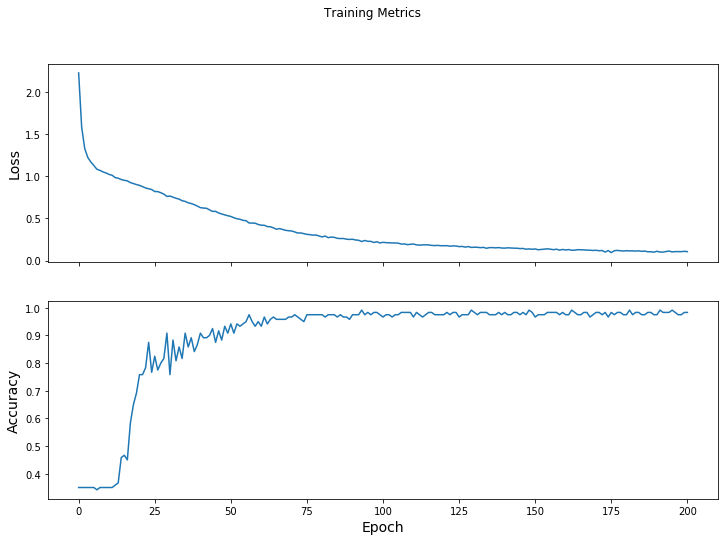

In [22]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

## Test

In [23]:
test_fp = '../data/iris_test.csv'

In [24]:
test_dataset = tf.data.TextLineDataset(test_fp)
test_dataset = test_dataset.skip(1)             # skip header row
test_dataset = test_dataset.map(parse_csv)      # parse each row with the funcition created earlier
test_dataset = test_dataset.shuffle(1000)       # randomize
test_dataset = test_dataset.batch(32)           # use the same batch size as the training set

In [25]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in tfe.Iterator(test_dataset):
    prediction = tf.argmax(model(x), axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [26]:
class_ids = ["Iris setosa", "Iris versicolor", "Iris virginica"]

predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    name = class_ids[class_idx]
    print("Example {} prediction: {}".format(i, name))

Example 0 prediction: Iris setosa
Example 1 prediction: Iris versicolor
Example 2 prediction: Iris virginica
